In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from Helpers import helpers

/Users/tjibbevanderende/anaconda3/envs/notebook-thesis/lib/python3.8/site-packages/art/estimators/certification/__init__.py:14: UserWarning: PyTorch not found. Not importing DeepZ or Interval Bound Propagation functionality
  warnings.warn("PyTorch not found. Not importing DeepZ or Interval Bound Propagation functionality")
/Users/tjibbevanderende/Documents/GitHub/notebook/Helpers/ldp_mechanism.py:231: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if dimensions is 2:
/Users/tjibbevanderende/Documents/GitHub/notebook/Helpers/ldp_mechanism.py:234: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif dimensions is 3:
/Users/tjibbevanderende/Documents/GitHub/notebook/Helpers/ldp_mechanism.py:277: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if dimensions is 2:
/Users/tjibbevanderende/Documents/GitHub/notebook/Helpers/ldp_mechanism.py:280: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif dimensions is 3:


In [3]:
# Load data
plain_data = pd.read_csv('../data/heart-dataset/heart_numerical.csv')
heart_2d_columns = ['baseline value', 'histogram_min']
plain_data_2d = plain_data[heart_2d_columns]
epsilon = 5

In [4]:
print(plain_data_2d.head())

   baseline value  histogram_min
0           120.0           62.0
1           132.0           68.0
2           133.0           68.0
3           134.0           53.0
4           132.0           53.0


In [5]:
piecewise_data = helpers.generate_piecewise_perturbation(plain_data_2d, epsilon)
piecewise_data

array([[119.90505316, 146.25024699],
       [130.17403703,  69.48191316],
       [133.78140354,  68.18481261],
       ...,
       [141.69350577,  92.6320888 ],
       [141.534969  , 103.13678125],
       [143.4692688 , 122.07491889]])

<Axes: xlabel='baseline value', ylabel='histogram_min'>

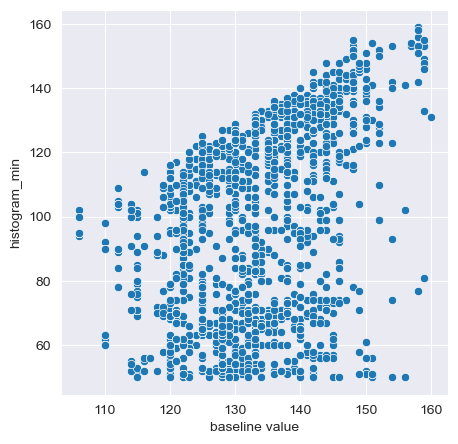

In [6]:
# Plot data
fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(x='baseline value', y='histogram_min', data=plain_data_2d, ax=ax)

<Axes: xlabel='baseline value', ylabel='histogram_min'>

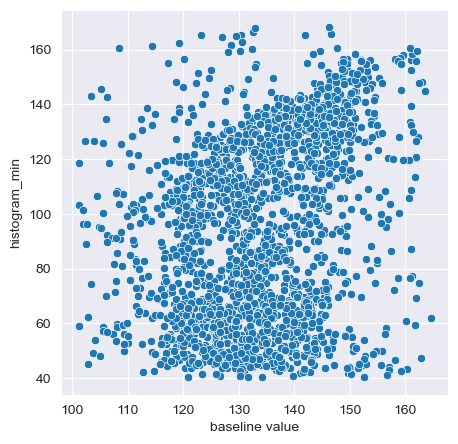

In [7]:
# Plot piecewise data
fig, ax = plt.subplots(figsize=(5, 5))
piecewise_data = pd.DataFrame(piecewise_data, columns=heart_2d_columns)
sns.scatterplot(x='baseline value', y='histogram_min', data=piecewise_data, ax=ax)

In [8]:
def plot_differences(epsilon, plain_df: pd.DataFrame):
    fig, ax = plt.subplots(1, 3, figsize=(10, 5))
    ldp_mechanism = helpers.ldp_mechanism()
    laplace_data = ldp_mechanism.randomise(plain_df, epsilon, max_iterations=50)
    piecewise_data = pd.DataFrame(helpers.generate_piecewise_perturbation(plain_df, epsilon), columns=plain_df.columns)
    columns = plain_df.columns
    print(columns[0], columns[1])
    sns.scatterplot(x=columns[0], y=columns[1], data=plain_data, ax=ax[0], alpha=0.5)
    sns.scatterplot(x=columns[0], y=columns[1], data=piecewise_data, ax=ax[1], alpha=0.5)
    sns.scatterplot(x=columns[0], y=columns[1], data=laplace_data, ax=ax[2], alpha=0.5)
    plt.show()

Run appropiate mechanism to generate a private dataset...
Run 2D-Laplace mechanism...
Approximate the private dataset outside the domain to be inside the domain of the non-private dataset using a grid...
Points outside domain for grid remapping: 501
All data that was remapped using a grid, is optimally remapped...
No is_remapped column found, so we find them ourself
Points outside domain.... (501, 3)
Shapes (2126, 3) (2126, 3)
baseline value histogram_min


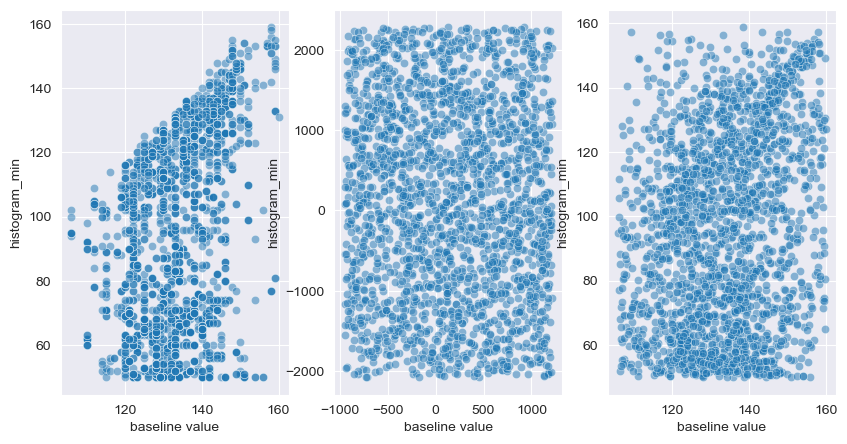

In [9]:
plot_differences(0.1, plain_data_2d)

In [10]:
plain_data_seeds = helpers.load_dataset('../data/seeds-dataset/rq1.csv')
plain_data_seeds.drop(columns=['class'], inplace=True)
plain_data_seeds.head()


,area,perimeter
0,15.26,14.84
1,14.88,14.57
2,14.29,14.09
3,13.84,13.94
4,16.14,14.99


Run appropiate mechanism to generate a private dataset...
Run 2D-Laplace mechanism...
Approximate the private dataset outside the domain to be inside the domain of the non-private dataset using a grid...
Points outside domain for grid remapping: 197
All data that was remapped using a grid, is optimally remapped...
No is_remapped column found, so we find them ourself
Points outside domain.... (197, 3)
Shapes (210, 3) (210, 3)


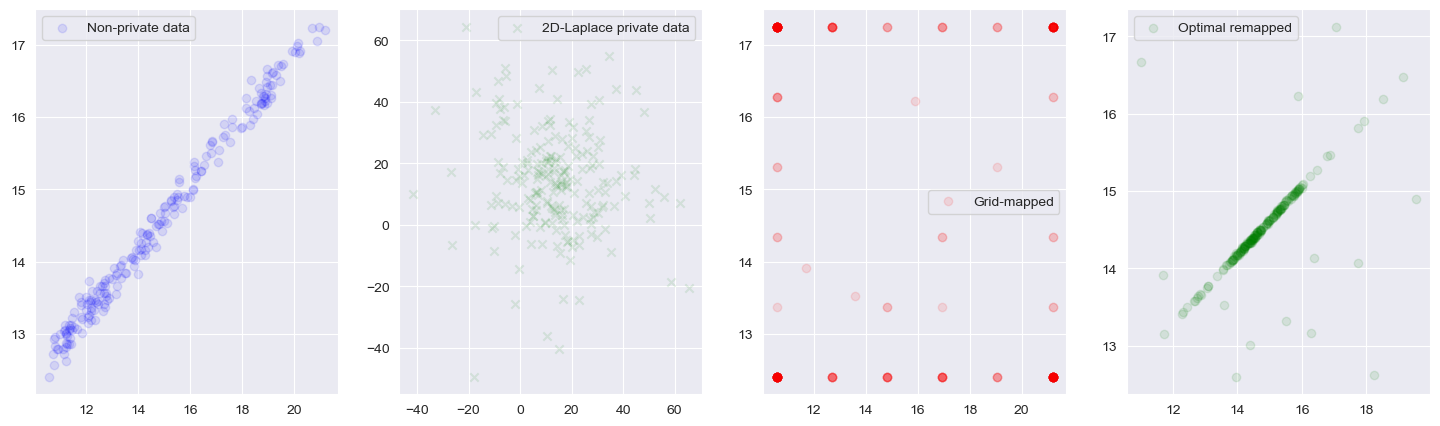

In [13]:
ldp_mechanism = helpers.ldp_mechanism()
laplace_data_seeds = ldp_mechanism.randomise(plain_data_seeds, 0.1, plot_validation=True)
